# IPBMA_7: CT Sinogram

**Authors**: 
- Pablo García Fernández (pablo.garcia.fernandez2@rai.usc.es)
- Javier Goya Pérez (javier.goya@rai.usc.es)
- Sindy Rocío Mojica Gómez (sindyrocio.mojica@rai.usc.es)

In [35]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt
%run ./funciones.py
%run ./funciones_phantoms.py

SOURCE

In [36]:
# X-RAY SOURCE

kVp= 100
I0= 75000  
N0, eE= source(kVp, I0)

print(N0, eE)


75000 40.0


In [37]:
# OBJECT

edge_size= 256
eE= 40

# Probamos con los dos cubos: el simétrico y el asimétrico
obj = cube_phantom_cc(edge_size, eE)
obj2 = cube_phantom(edge_size, eE)


coef_bone: 1.27776
coef_soft: 0.284928
coef_air: 0.0002994
coef_water: 0.2683
coef_soft: 0.284928


In [38]:
# CT INTERACTOR

nProjections= 180
h= 128
qSinograma= interactor_CT(N0, obj, h, nProjections)

######
# Este cubo es asimétrico (está divido en dos regiones distintas) 
qSinograma_malo= interactor_CT(N0, obj2, h, nProjections)

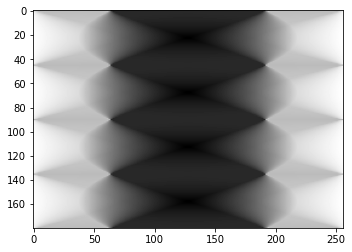

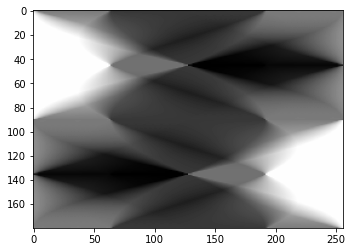

In [39]:
# Cubo simétrico
plt.imshow(qSinograma, cmap="gray")
plt.show()

# Cubo asimétrico
plt.imshow(qSinograma_malo, cmap="gray")
plt.show()

In [40]:
# DETECTOR ------%% A partir de aquí solo con el simétrico (igual que en el guión)
%run ./funciones.py
nDetectors=64
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)

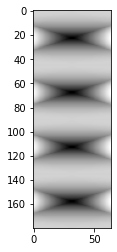

In [41]:
plt.imshow(dSinograma, cmap="gray")
plt.show()

In [42]:
# PROCESSING
pSinograma= process_CT(dSinograma, N0)

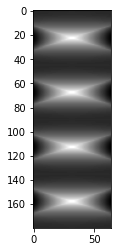

In [43]:
plt.imshow(pSinograma, cmap="gray")
plt.show()

SAVE GENERIC SINOGRAM

In [44]:
# FEATURES
nProjections= 360
h= 128
nDetectors= 512

In [45]:
qSinograma= interactor_CT(N0, obj, h, nProjections)

In [46]:
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)

In [47]:
%run ./funciones.py
pSinograma= process_CT(dSinograma, N0)

In [48]:
np.save("sinogram.npy", pSinograma)

In [49]:
plt.imsave("sinogram.png", pSinograma, cmap='gray')

In [50]:
pSinograma= np.load('sinogram.npy')

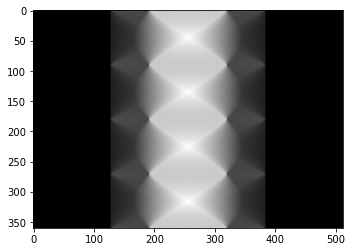

In [51]:
plt.imshow(pSinograma, cmap="gray")
plt.show()